# Modeling The Mayfly Population

## Introduction

Mayflies, similar to dragonflies, are aquatic insects found near streams and rivers throughout North America. Mayflies have a life span of about twenty four hours. An interesting problem would be to model how the population of Mayflies change depending on different starting populations and growth rates.

The Mayfly population can be modeled with the following equation

$$y_n = b(1-y_{n-1})y_{n-1}$$

Where $y_n$ is the current population as a percentage of the population's maximum capacity, $y_{n-1}$ is the population of the previous unit of time, and $b$ is the growth rate. Our goal is to see how different growth rates and initial populaton values affect the growth of the mayfly population.

We start with defining a function `Pop_Model`that creates a list of current populations for each generation. 

In [9]:
def Pop_Model(y_o, b, generation):         # This function will model the population given some
                                                # initial population, growth rate, and generation.
    pops = [y_o]                           # Create a list of populations for each generation
    for indexes in range(1, generation+1): # Create a for loop to iterate over the model for each
                                                # generation
        y = b*(1 - pops[-1])*pops[-1]      # This is the model we are using
        pops.append(y)                     # Add each new population value into the pops list
    return pops                            # Return that list

## Plotting Mayfly Populations to Initial Populations for Different Growth Rates


From here, we create a function `Pop_To_Init` that models how the population changes with different initial populations given a specific growth rate and generation count.

In [18]:
def Pop_To_Init(b, generation):             # Takes a growth rate and generation count.
    y0_list = [t/100 for t in range(101)]   # Creates a list of initial pop values from 0 to 1
    pop_list = [Pop_Model(yo, b, generation)[-1] for yo in y0_list] # Creates a population list
                                                                    # for each initial population
    return y0_list, pop_list # Returns initial populations list and Populations list.

We now create a plotting function called `b_plot` to plot our population to initial population model for different growth rates and generations.

In [19]:
import matplotlib.pyplot as plt

In [20]:
def b_plot(b, generation):                     # Initial function for plotting
    for gens in range(1, generation):          # Iterate over the generations
        inputs, outputs = Pop_To_Init(b, gens) # Call our Pop_to_Init function
        plt.plot(inputs, outputs)              # Plot the values from Pop_To_Init

We now create a function called `b_subplotter` to create graphs to compare populations to initial populations with growth rates of $b = 1$, $b=1.5$, $b=2$, $b=3.5$ and generations of 10

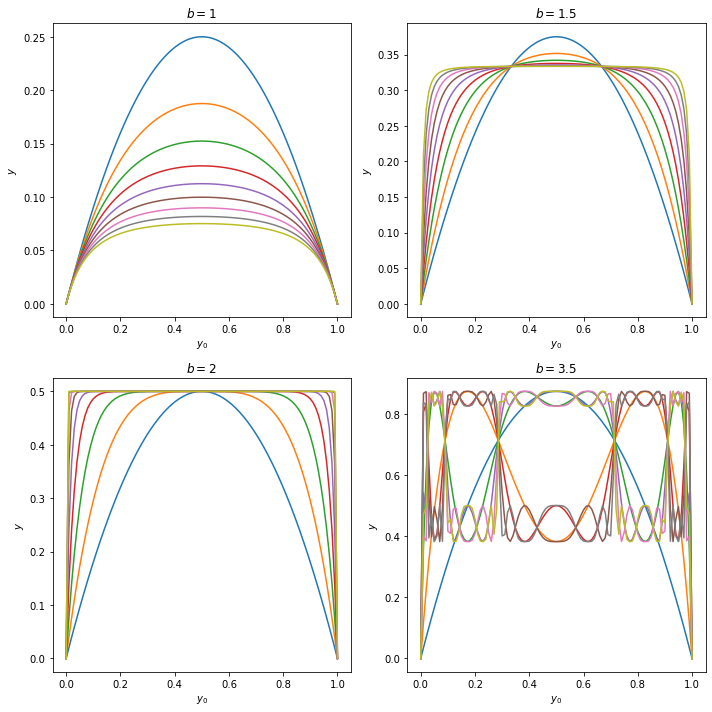

In [22]:
def b_subplotter(generation):
    plt.figure(figsize=(10,10), tight_layout = True)
    plt.subplot(2,2,1)
    plt.xlabel('$y_0$')
    plt.ylabel('$y$')
    plt.title("$b=1$")
    plotter1(1, generation)
    plt.subplot(2,2,2)
    plt.xlabel('$y_0$')
    plt.ylabel('$y$')
    plt.title("$b=1.5$")
    plotter1(1.5, generation)
    plt.subplot(2,2,3)
    plt.xlabel('$y_0$')
    plt.ylabel('$y$')
    plt.title("$b=2$")
    plotter1(2, generation)
    plt.subplot(2,2,4)
    plt.xlabel('$y_0$')
    plt.ylabel('$y$')
    plt.title("$b=3.5$")
    plotter1(3.5, generation)
    plt.show()
    
b_subplotter(10)

As you can see from the graphs above, the mayfly population have the largest ending populations when starting from an initial population of 0.5. This would make sense because an inital population too low would take too long to reproduce while a intial population too high is near the capcity of the population. No matter how high or low the growth rate is, you can see that populations don't increase nor decrease when starting with a population of 0 or 1. At a populaton of 1, the mayfly model can't get any larger because the population is at its maximum carrying capacity. You can also see that as the amount of generations increase, the less parabolic the models become.

## Plotting Mayfly Populations to Different Growth Factors for Different Initial Populations

Now we create a function `Pop_To_B` that models how the population changes with different growth factors given a specific initial population and generation count.

In [35]:
def Pop_To_B(y0, generation):             # Takes an initial population and generation count.
    b_list = [t/100 for t in range(401)]      # Creates a list of growthfactors from 0 to 4
    pop_list = [Pop_Model(y0, b, generation)[-1] for b in b_list] # Creates a population list
                                                                    # for each growth factor
    return b_list, pop_list         # Returns b list and Populations list.

We now create a plotting function called `Init_Plot` to plot our population to growth factor model for different initial populations and generations.

In [46]:
def Init_Plot(y_o, generation):                # Initial function for plotting
    for gens in range(1, generation):          # Iterate over the generations
        inputs, outputs = Pop_To_B(y_o, gens)  # Call our Pop_to_Init function
        plt.plot(inputs, outputs, ",")         # Plot the values from Pop_To_Init

From here we use `y0_subplotter` to create graphs to compare populations to growth factors with initial populations of  growth rates of  $y_0=0.25$, $y_0=0.5$, $y_0=0.75$  and generations of 10.

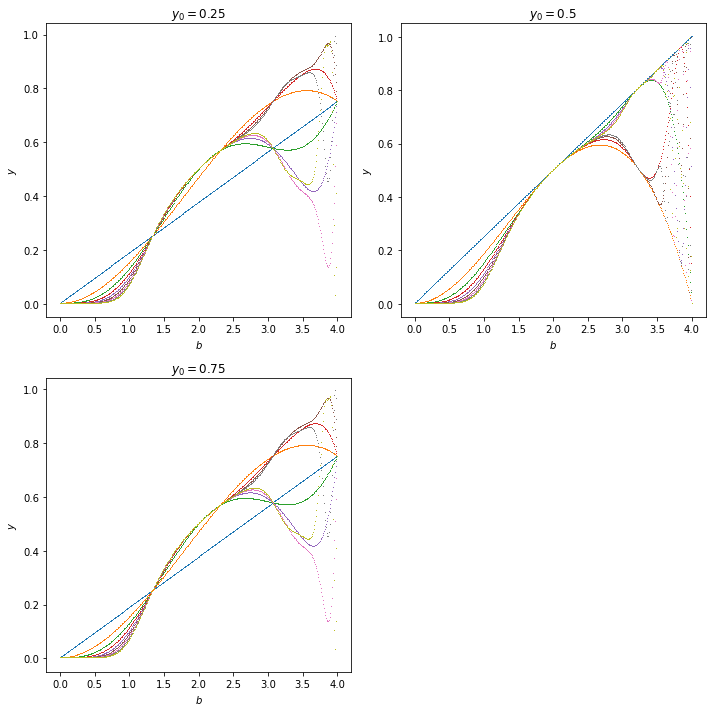

In [45]:
def y0_subplotter(generation):
    plt.figure(figsize=(10,10), tight_layout = True)
    plt.subplot(2,2,1)
    plt.xlabel('$b$')
    plt.ylabel('$y$')
    plt.title("$y_0=0.25$")
    Init_Plot(0.25, generation)
    plt.subplot(2,2,2)
    plt.xlabel('$b$')
    plt.ylabel('$y$')
    plt.title("$y_0=0.5$")
    Init_Plot(0.5, generation)
    plt.subplot(2,2,3)
    plt.xlabel('$b$')
    plt.ylabel('$y$')
    plt.title("$y_0=0.75$")
    Init_Plot(0.75, generation)
    plt.show()
    
y0_subplotter(10)

Looking at each of the graphs, it looks like initial population has minimal affect on population growth when $b \leq 1.5$. You can also see that the population reaches a some sort of maximum population when $b \approx 3$

## Conclusion

To conclude, we can see that the mayfly model grows to its highest population when it has an inital population of $y_o = 0.5$. The mayfly population also grows the fastest when its growth factor is between $1.5 \leq b \leq 3$.